In [4]:
import matplotlib.pyplot as plt
import cv2
import os
from default_cnn_model import DefaultModel
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
import tensorflow as tf
warnings.filterwarnings("ignore", category=DeprecationWarning) 
tf.random.set_seed(221)
np.random.seed(221)
tf.get_logger().setLevel('INFO')

In [5]:
import numpy as np
def getImageResized(r, file):
  filepath = os.path.join(r, file)
  img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_CUBIC)
  return img

def plotFirstImages(files, action):
  print("Exemplo de padrões de compra da ação ", action)
  plt.figure(0)
  plt.subplot(221)
  plt.imshow(files[0], cmap=plt.get_cmap('gray'))
  plt.subplot(222)
  plt.imshow(files[1], cmap=plt.get_cmap('gray'))
  plt.subplot(223)
  plt.imshow(files[2], cmap=plt.get_cmap('gray'))
  plt.subplot(224)
  plt.imshow(files[3], cmap=plt.get_cmap('gray'))
  plt.show()

def parseImagesToArray(path):
  aux_arr = []
  for r, d, f in os.walk(path):
    for file in f:
      aux_arr.append(getImageResized(r,file))
  return aux_arr

def reshape_data(data):
  img_rows, img_cols = 28, 28
  data = data.reshape(data.shape[0], img_rows, img_cols, 1)
  data = data / 255
  return data

Shape dos dados de treino antes do resize  (4735, 28, 28)
Shape dos dados de treino depois do resize e normalização (4735, 28, 28, 1)
Exemplo de padrões de compra da ação  BBAS3.SA


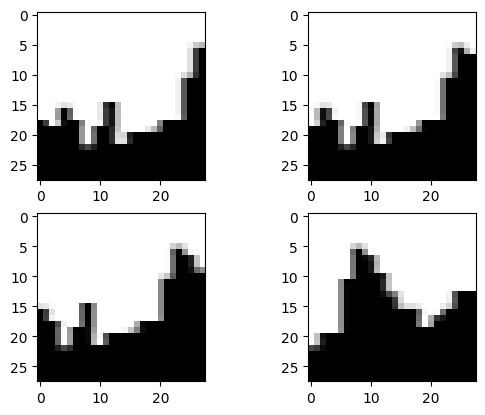

Treinando modelo para a ação: BBAS3.SA


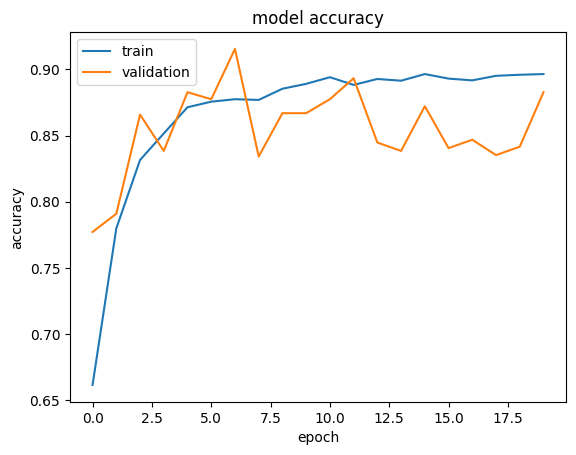

Erro da CNN: 11.73%
Acurária da CNN: 88.27%
Matriz de confusão


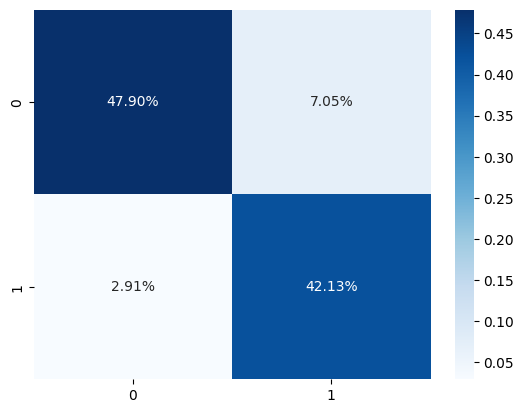

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.94      0.87      0.91      2602
         1.0       0.86      0.94      0.89      2133

    accuracy                           0.90      4735
   macro avg       0.90      0.90      0.90      4735
weighted avg       0.90      0.90      0.90      4735



--------------------------------------------#################------------------------------------------------------


Shape dos dados de treino antes do resize  (4743, 28, 28)
Shape dos dados de treino depois do resize e normalização (4743, 28, 28, 1)
Exemplo de padrões de compra da ação  CSNA3.SA


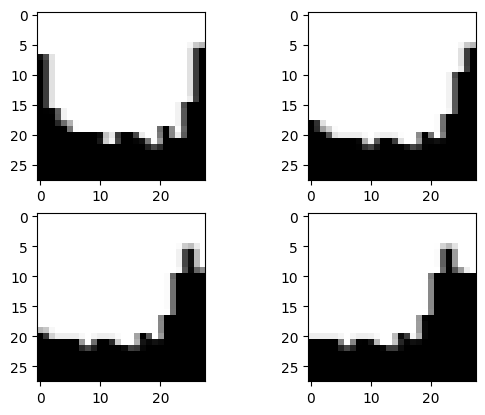

Treinando modelo para a ação: CSNA3.SA


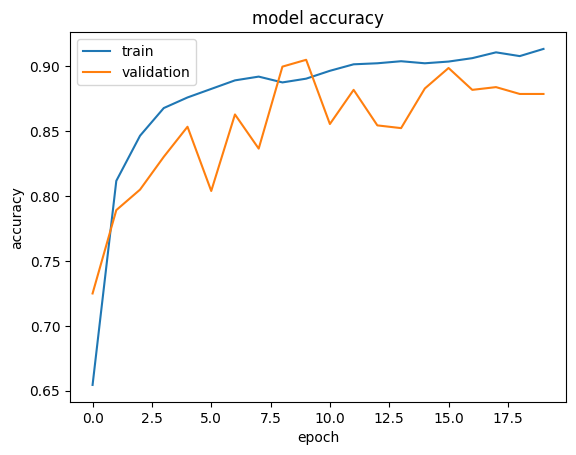

Erro da CNN: 11.64%
Acurária da CNN: 88.36%
Matriz de confusão


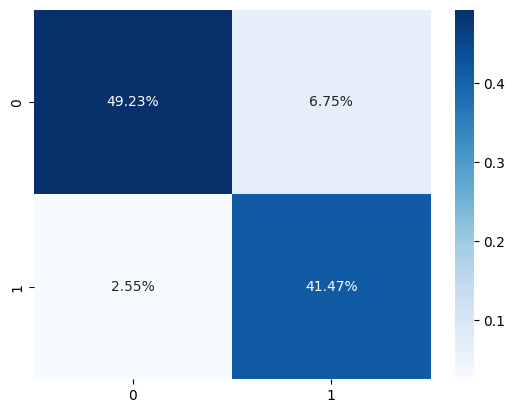

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91      2655
         1.0       0.86      0.94      0.90      2088

    accuracy                           0.91      4743
   macro avg       0.91      0.91      0.91      4743
weighted avg       0.91      0.91      0.91      4743



--------------------------------------------#################------------------------------------------------------


Shape dos dados de treino antes do resize  (4808, 28, 28)
Shape dos dados de treino depois do resize e normalização (4808, 28, 28, 1)
Exemplo de padrões de compra da ação  PETR4.SA


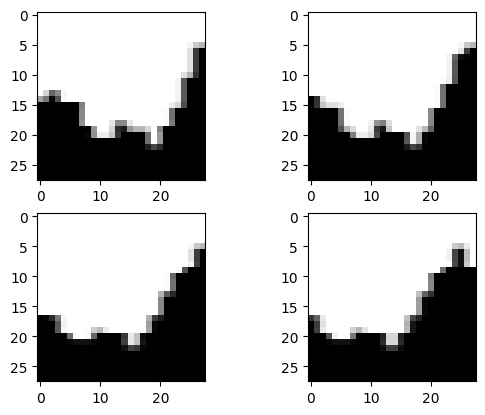

Treinando modelo para a ação: PETR4.SA


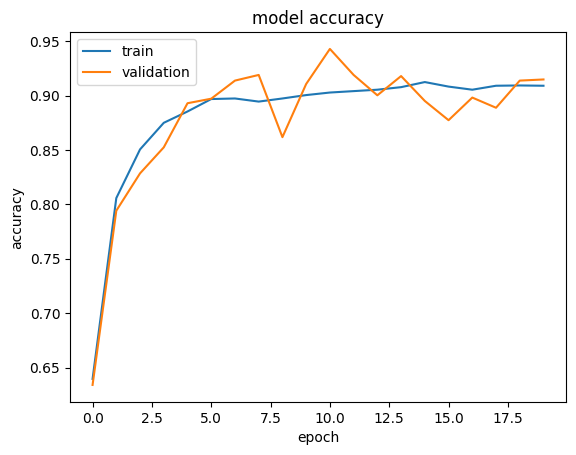

Erro da CNN: 12.72%
Acurária da CNN: 87.28%
Matriz de confusão


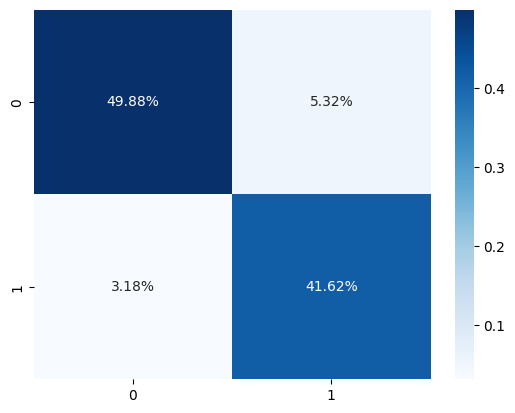

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      2654
         1.0       0.89      0.93      0.91      2154

    accuracy                           0.91      4808
   macro avg       0.91      0.92      0.91      4808
weighted avg       0.92      0.91      0.92      4808



--------------------------------------------#################------------------------------------------------------


Shape dos dados de treino antes do resize  (4808, 28, 28)
Shape dos dados de treino depois do resize e normalização (4808, 28, 28, 1)
Exemplo de padrões de compra da ação  VALE3.SA


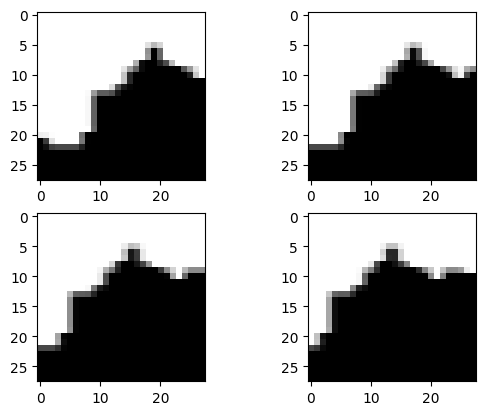

Treinando modelo para a ação: VALE3.SA


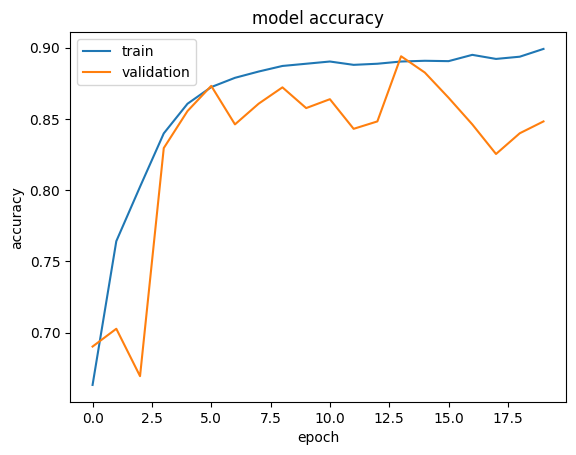

Erro da CNN: 11.06%
Acurária da CNN: 88.94%
Matriz de confusão


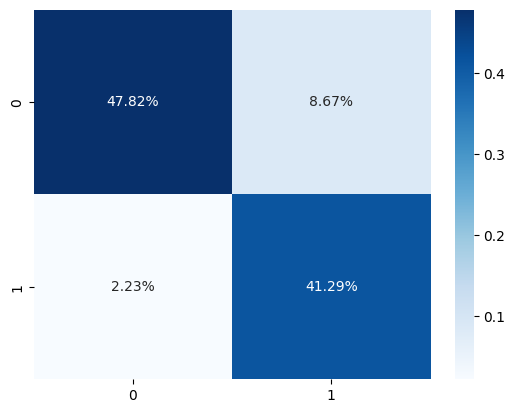

Precision, recall e f1-score
              precision    recall  f1-score   support

         0.0       0.96      0.85      0.90      2716
         1.0       0.83      0.95      0.88      2092

    accuracy                           0.89      4808
   macro avg       0.89      0.90      0.89      4808
weighted avg       0.90      0.89      0.89      4808



--------------------------------------------#################------------------------------------------------------




In [6]:
actions = ["BBAS3.SA", "CSNA3.SA", "PETR4.SA", "VALE3.SA"]

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

for action in actions:
  training_buy_path = "./" + action + "./imagens/treino/comprar"
  training_sell_path = "./" + action + "./imagens/treino/vender"
  test_buy_path = "./" + action + "./imagens/teste/comprar"
  test_sell_path = "./" + action + "./imagens/teste/vender"


  train_buy_actions = parseImagesToArray(training_buy_path)
  train_sell_actions = parseImagesToArray(training_sell_path)

  x_train = np.concatenate((train_buy_actions, train_sell_actions), axis=0)
  print("Shape dos dados de treino antes do resize ", x_train.shape)
  x_train = reshape_data(x_train)
  print("Shape dos dados de treino depois do resize e normalização", x_train.shape)

  y_train = np.concatenate((np.ones(len(train_buy_actions)), np.zeros(len(train_sell_actions))), axis=0)

  plotFirstImages(train_buy_actions, action)

  model = DefaultModel().build()
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  print("Treinando modelo para a ação:", action)
  history = model.fit(x_train, y_train, validation_split = 0.2, epochs=20, batch_size=500, verbose=0)

  plt.figure(1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

  test_buy_actions = []
  test_sell_actions = []

  for r, d, f in os.walk(test_buy_path):
    for file in f:
      test_buy_actions.append(getImageResized(r,file))

  for r, d, f in os.walk(test_sell_path):
    for file in f:
      test_sell_actions.append(getImageResized(r,file))

  x_test = np.concatenate((test_buy_actions, test_sell_actions), axis=0)
  y_test = np.concatenate((np.ones(len(test_buy_actions)), np.zeros(len(test_sell_actions))), axis=0)

  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  x_test = x_test / 255

  scores = model.evaluate(x_test, y_test, verbose=0)
  print("Erro da CNN: %.2f%%" % (100-scores[1]*100))
  print("Acurária da CNN: %.2f%%" % (scores[1]*100))


  print("Matriz de confusão")
  y_pred = model.predict(x_train, verbose = 0)
  y_pred = np.array(np.round(y_pred))
  y_train = np.array(y_train)
  cf_matrix = confusion_matrix(y_train, y_pred)
  sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
  plt.show()

  print("Precision, recall e f1-score")
  print(classification_report(y_train, y_pred)) 

  print("\n")
  print("--------------------------------------------#################------------------------------------------------------")
  print("\n")
  model.save("./models/cnns/" + action + '_model.hdf5', )
